In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Для начала вывел хэд, чтобы посмотреть, что из себя представляют данные. Какие из них численные, а какие категориальные. Обнвружил, что в данном датасете пропуски заполнены вопросителными знаками, вместо привычного NaN. Решил такие строки удалить. Написал цикл, который проходится по всем столбцам и, найдя в каком-то столбце ячейку с вопросительным знаком, удаляет соответствующую ей строку из датасета.

In [3]:
for column in data.columns:
    data = data.drop(data[data[column] == '?'].index)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Занёс в отдельную переменную датасет со столбцами, содержащие категориальные признаки, применил метод для их преобразования в числа. После чего заджойнил полученный датасет с оставшимися столбцами, кроме столбца с зарплатой, так как он является целевой переменной

In [4]:
selectedColumns = data [['workclass', 'education', 'marital-status', 
                         'occupation', 'relationship', 'race', 'gender', 'native-country']]
X1 = pd.get_dummies (selectedColumns, columns = selectedColumns.columns)
X2 = data[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
X1 = X1.join(X2)
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Columns: 104 entries, workclass_Federal-gov to hours-per-week
dtypes: int64(6), uint8(98)
memory usage: 7.6 MB


In [5]:
le = LabelEncoder()
le.fit( data['income'])
y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

(array([  294.,   449.,  1499.,  1223.,  2196., 14783., 11858.,  1507.,
        10084.,  1329.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

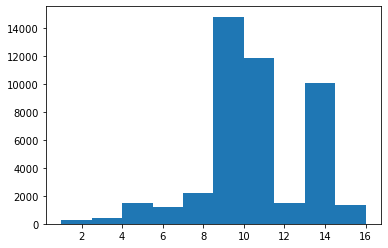

In [6]:
plt.hist(data[['educational-num']])

### Построил гистаграмму с числом имеющихся дипломов об образовании, чтобы посмотреть, какое количество чаще встречается, то есть какое количество образований у среднестатистического человека. 

(array([  777.,  2825.,  2933., 24910.,  4482.,  5621.,  2541.,   648.,
          287.,   198.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

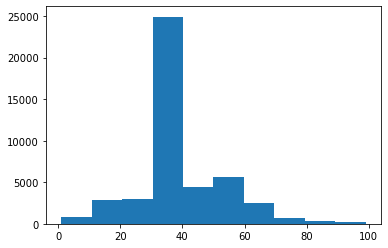

In [7]:
plt.hist(data[['hours-per-week']])

### То же самое проделал с часами работы в неделю, чтобы понять, сколько примерно люди работают и какое значение встречается чаще всего.

In [12]:
LR = make_pipeline(StandardScaler(), LogisticRegression())
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test,y_test))

0.848017690728163
0.8500036854131348


### Обучил модель логистической регрессии на основе наших данных. Получил точность предсказания на обучающей и тестовой выборках.

In [13]:
SV = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
SV.fit(X_train, y_train)
print(SV.score(X_train, y_train))
print(SV.score(X_test,y_test))

0.8584109935239299
0.8510356010908823


### То же самое соответственно проделал, используя SVC модель.

## Выводы:
### 1) Я считаю, что с поставленной задачей я справился не в полной мере. Как минимум, количество столбцов в полученных данных оказалось больше сотни, что не есть хорошо, так как для обработки этих данных и обучения модели требуется относительно нехилая вычислительная мощность, плюс такой объём данных неплохо забивает оперативную память. Стоило бы построить тепловую карту, чтобы определить, какие признаки сильнее всего кореллируют с доходностью. Так как половина признаков - категориальные и их приходится преобразовывать в числа, то даже удаления пары несильно влияющих подобных признаков уже бы ощутимо сократило объём анализируемых данных для постройки модели с несильной потерью точности. 
### 2) Обе модели показали примерно одинаковую точность, что, как по мне,  говорит о том, что данные очень "кучно" расположены, их можно явно разделить, коридор(труба) между ними небольшой(-ая). Так как в ходе работы выяснилось, что SVC модель в данном случае требует больше времени для обучения, то в дальнейшем при подобных задачах следует использовать логистическую регрессию, так как времени она займёт меньше, а результат будет тот же.